In [192]:
import numpy as np
import pandas as pd
df = pd.read_csv('IPl_auction_list.csv')

In [193]:
df.head(10)

,No.,Name,Country,Age,IPL,Specialism,2020 Team,2020 IPL,C/U/A,Reserve Price (in Lakh),Pr,to
0,1,Aaron Finch,Australia,34,87,Batsman,RCB,12,Capped,100,0.0,NaN
1,1,Alex Hales,England,32,6,Batsman,,,Capped,150,0.0,NaN
2,1,Evin Lewis,West Indies,29,16,Batsman,,,Capped,100,0.0,NaN
3,1,Karun Nair,India,29,73,Batsman,KXIP,4,Capped,50,50.0,KKR
4,1,Jason Roy,England,30,8,Batsman,DC,0,Capped,200,0.0,NaN
5,1,Steve Smith,Australia,31,95,Batsman,RR,14,Capped,200,220.0,DC
6,1,Hanuma Vihari,India,27,24,Batsman,,,Capped,100,0.0,NaN
7,,,,,,,,,,,NaN,NaN
8,2,Shakib Al Hasan,Bangladesh,34,63,All-rounder,,,Capped,200,320.0,KKR
9,2,Moeen Ali,England,33,19,All-rounder,RCB,3,Capped,200,700.0,CSK


In [194]:
df['Name'].replace('\xa0', np.nan, inplace=True)
df.dropna(subset=["Name"],inplace=True)

In [156]:
country = {}
for i in df.iloc[:,2]:
    if i != 'India':
        if i in country:
            country[i] += 1
        else:
            country[i] = 1

In [157]:
country['other'] = 3
del country['Nepal']
del country['USA']
del country['UAE']

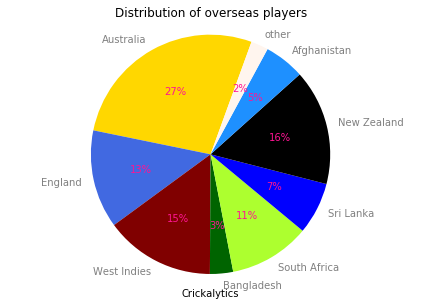

In [158]:
import matplotlib.pyplot as plt
# Pie chart
labels = []
sizes = []
for key in country:
    labels.append(key)
    sizes.append(country[key])
#colors
colors = ['gold','royalblue','maroon','darkgreen','greenyellow','blue','k','dodgerblue','seashell']
 
fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, colors = colors,
                                    labels=labels, autopct='%1.0f%%', startangle=70)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('deeppink')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribution of overseas players')
plt.xlabel('Crickalytics')
plt.savefig('ipl_player_dist.png',bbox_inches='tight', pad_inches=1)
plt.show()


In [159]:
country_price = {}
for i in range(df.shape[0]):
    if df.iloc[i,2] in country_price:
        country_price[df.iloc[i,2]]['total'] += int(df.iloc[i,9])
        country_price[df.iloc[i,2]]['no.'] += 1
    else:
        country_price[df.iloc[i,2]] = {'total':int(df.iloc[i,9]),'no.':1}

In [160]:
country_price

{'Australia': {'total': 2480, 'no.': 35},
 'England': {'total': 2165, 'no.': 17},
 'West Indies': {'total': 1115, 'no.': 19},
 'India': {'total': 4210, 'no.': 164},
 'Bangladesh': {'total': 425, 'no.': 4},
 'South Africa': {'total': 735, 'no.': 14},
 'Sri Lanka': {'total': 360, 'no.': 9},
 'New Zealand': {'total': 1015, 'no.': 20},
 'Afghanistan': {'total': 410, 'no.': 7},
 'Nepal': {'total': 40, 'no.': 1},
 'USA': {'total': 40, 'no.': 1},
 'UAE': {'total': 20, 'no.': 1}}

In [161]:
prices = np.array([])
total_countries=0
for key in country_price:
    prices = np.append(prices, key)
    prices = np.append(prices, round(country_price[key]['total']/country_price[key]['no.'],2))
    total_countries+=1
    prices = np.append(prices, country_price[key]['no.'])
prices = prices.reshape(total_countries,3)
prices = prices[prices[:,1].astype('float64').argsort()[::-1]]
prices = np.concatenate((np.arange(1,prices.shape[0]+1).reshape(prices.shape[0],1),prices),axis=1)

In [162]:
prices = pd.DataFrame(prices, columns =['Rank', 'Country', 'Average price(Lakh)', 'No. of players available']) 

In [163]:
prices

,Rank,Country,Average price(Lakh),No. of players available
0,1,England,127.35,17
1,2,Bangladesh,106.25,4
2,3,Australia,70.86,35
3,4,West Indies,58.68,19
4,5,Afghanistan,58.57,7
5,6,South Africa,52.5,14
6,7,New Zealand,50.75,20
7,8,USA,40.0,1
8,9,Nepal,40.0,1
9,10,Sri Lanka,40.0,9


In [164]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Table(
    header=dict(values=list(prices.columns),
                fill_color='lightgreen',
                align='left'),
    cells=dict(values=[prices.Rank, prices.Country, prices['Average price(Lakh)'], prices['No. of players available']],
               fill_color='mintcream',
               align='left'))
])
fig.update_layout(title_text='Crickalytics')
fig.show()

In [132]:
special = {}
for i in range(df.shape[0]):
        if df.iloc[i,5] in special:
            if int(df.iloc[i,-3]) >= 80:
                special[df.iloc[i,5]]['premium'] += 1
            elif int(df.iloc[i,-3]) < 80 and int(df.iloc[i,-1]) >= 40:
                special[df.iloc[i,5]]['standard'] += 1
            else:
                special[df.iloc[i,5]]['budget'] += 1
        else:
            if int(df.iloc[i,-3]) >= 80:
                special[df.iloc[i,5]]= {'premium':1, 'standard':0,'budget':0}
            elif int(df.iloc[i,-3]) < 80 and int(df.iloc[i,-1]) >= 40:   
                special[df.iloc[i,5]]= {'premium':0, 'standard':1,'budget':0}                
            else:
                special[df.iloc[i,5]]= {'premium':0, 'standard':0,'budget':1} 

ValueError: invalid literal for int() with base 10: 'KKR'

In [204]:
special

{'Batsman': {'premium': 7, 'standard': 8, 'budget': 25},
 'All-rounder': {'premium': 10, 'standard': 39, 'budget': 79},
 'Keeper': {'premium': 3, 'standard': 5, 'budget': 16},
 'Bowler': {'premium': 13, 'standard': 34, 'budget': 53}}

In [178]:
labels=[]
standard=['premium','standard', 'budget']
premium_sizes = []
for key in special:
    labels.append(key)
    for i in standard:
        premium_sizes.append(special[key][i])
sizes=[]
for j in range(0,12,3):
    sizes.append(premium_sizes[j+0]+premium_sizes[j+1]+premium_sizes[j+2])

In [188]:
sizes

[40, 128, 24, 100]

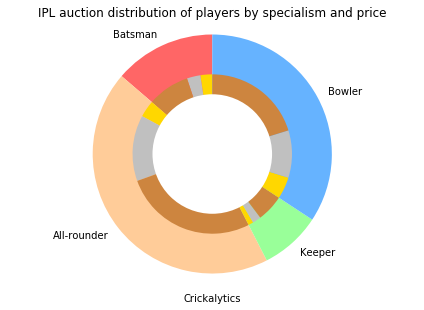

In [241]:
import matplotlib.pyplot as plt
leg = labels+standard[0:3]
# Data to plot
standard = ['premium','standard', 'budget','premium','standard', 'budget',
            'premium','standard', 'budget', 'premium','standard', 'budget']
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['gold','silver', 'peru','gold','silver', 'peru',
                 'gold','silver', 'peru', 'gold','silver', 'peru']

#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,radius=3,frame=True)
plt.pie(premium_sizes, colors=colors_gender, startangle=90,radius=2)
#plt.legend(leg, loc='best')


#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title('IPL auction distribution of players by specialism and price')
plt.xlabel('Crickalytics')
plt.savefig('ipl_batbowl_dist.png',bbox_inches='tight', pad_inches=1)
plt.show()

In [330]:
import seaborn as sns
india_age=list(df[df.Country=='India']['Age'].astype('int64'))
print('The average Indian age is:',np.mean(india_age))
for i in (df[df.Country=='India'][df.Age.astype('int64')==17]['Name']):
    print('The youngest player is called',str(i),"He's:",min(india_age))
for i in (df[df.Country=='India'][df.Age.astype('int64')==40]['Name']):
    print('The youngest player is called',str(i),"He's:",max(india_age))


The average Indian age is: 26.475609756097562
The youngest player is called Khrievitso Kense He's: 17
The youngest player is called Harbhajan Singh He's: 40


/home/morgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/morgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [156]:
df = pd.read_csv('ipl_auction_teams.csv')

In [157]:
df

,Franchise,No of Players,No of Overseas Players,Total money spent (Rs.),Salary cap available (Rs.),Available Slots,Overseas Slots
0,CSK,19,7,65.10,19.90,6,1
1,DC,17,5,71.60,13.40,8,3
2,KXIP,16,3,31.80,53.20,9,5
3,KKR,17,6,74.25,10.75,8,2
4,MI,18,4,69.65,15.35,7,4
5,RR,16,5,47.15,37.85,9,3
6,RCB,14,5,49.60,35.40,11,3
7,SRH,22,7,74.25,10.75,3,1


In [158]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Table(
    header=dict(values=['Franchise', 'Salary cap available (Rs.)', 'Available Slots', 'Overseas Slots'],
                fill_color='lightgreen',
                align='left'),
    cells=dict(values=[df.Franchise, df['Salary cap available (Rs.)'], df['Available Slots'], df['Overseas Slots']],
               fill_color='mintcream',
               align='left'))
])
fig.update_layout(title_text='Crickalytics')
fig.show()

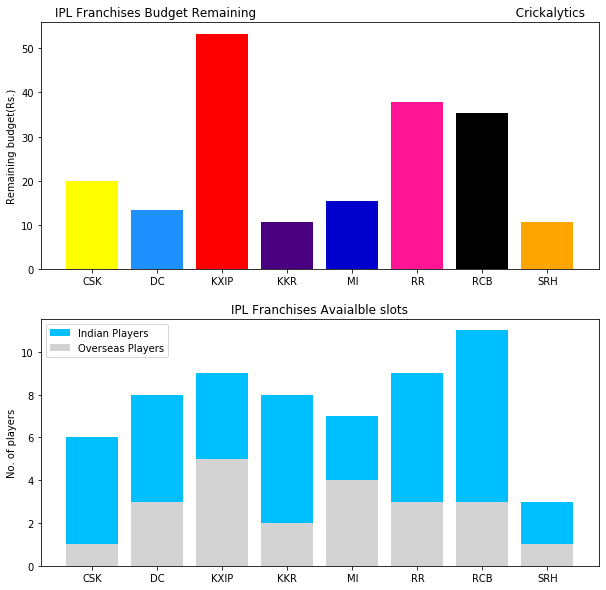

In [159]:
fig, axs = plt.subplots(2, figsize=(10,10))

axs[0].bar(df.Franchise, df['Salary cap available (Rs.)'], color=('yellow','dodgerblue','red','indigo','mediumblue',
                                                                  'deeppink','black','orange'))
    
axs[0].set(title='IPL Franchises Budget Remaining                                                                   Crickalytics',ylabel='Remaining budget(Rs.)')
axs[1].bar(df.Franchise, df['Available Slots'], color='deepskyblue')
axs[1].bar(df.Franchise, df['Overseas Slots'], color='lightgray')
axs[1].set(title='IPL Franchises Avaialble slots', ylabel='No. of players')
axs[1].legend(['Indian Players','Overseas Players'])
plt.savefig('ipl_franchises.png',bbox_inches='tight', pad_inches=3)
plt.show()

In [183]:
df = pd.read_csv('IPl_auction_list.csv')
df['Pr'].replace('\xa0', np.nan, inplace=True)
df['Pr'].replace(0, np.nan, inplace=True)
df.dropna(subset=["Pr"],inplace=True)

In [161]:
country_gone = {}
for i in range(len(df.iloc[:,2])):
    if int(df.iloc[i,-2]) != 0:
        if df.iloc[i,2] in country_gone:
            country_gone[df.iloc[i,2]]['No.'] += 1
            country_gone[df.iloc[i,2]]['Price'] += int(df.iloc[i,-2])
        else:
            country_gone[df.iloc[i,2]] = {'Price':int(df.iloc[i,-2]), 'No.':1}

In [162]:
country_gone

{'India': {'Price': 3290, 'No.': 31},
 'Australia': {'Price': 5320, 'No.': 8},
 'Bangladesh': {'Price': 420, 'No.': 2},
 'England': {'Price': 1650, 'No.': 5},
 'South Africa': {'Price': 1645, 'No.': 2},
 'New Zealand': {'Price': 1870, 'No.': 3},
 'Afghanistan': {'Price': 150, 'No.': 1},
 'West Indies': {'Price': 75, 'No.': 1}}

In [163]:
prices = np.array([])
total_countries=0
for key in country_gone:
    prices = np.append(prices, key)
    prices = np.append(prices, round(country_gone[key]['Price']/country_gone[key]['No.'],2))
    total_countries+=1
    prices = np.append(prices, country_gone[key]['No.'])
prices = prices.reshape(total_countries,3)
prices = prices[prices[:,1].astype('float64').argsort()[::-1]]
prices = np.concatenate((np.arange(1,prices.shape[0]+1).reshape(prices.shape[0],1),prices),axis=1)

In [164]:
prices = pd.DataFrame(prices, columns =['Rank', 'Country', 'Average price(Lakh)', 'No. of players bought']) 

In [165]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Table(
    header=dict(values=list(prices.columns),
                fill_color='lightgreen',
                align='left'),
    cells=dict(values=[prices.Rank, prices.Country, prices['Average price(Lakh)'], prices['No. of players bought']],
               fill_color='mintcream',
               align='left'))
])
fig.update_layout(title_text='Crickalytics')
fig.show()

In [65]:
country_gone = {}
for i in range(len(df.iloc[:,2])):
    if int(df.iloc[i,-2]) != 0:
        if df.iloc[i,-1] in country_gone:
            country_gone[df.iloc[i,-1]]['No.'] += 1
            country_gone[df.iloc[i,-1]]['Price'] += int(df.iloc[i,-2])
            if df.iloc[i,2] != 'India':
                country_gone[df.iloc[i,-1]]['Overseas'] +=1
        else:
            if df.iloc[i,2] != 'India':
                country_gone[df.iloc[i,-1]] = {'Price':int(df.iloc[i,-2]), 'No.':1,'Overseas':1}
            else:
                country_gone[df.iloc[i,-1]] = {'Price':int(df.iloc[i,-2]), 'No.':1,'Overseas':0}

In [66]:
prices = np.array([])
total_countries=0
for key in country_gone:
    prices = np.append(prices, key)
    prices = np.append(prices, round(country_gone[key]['Price']/country_gone[key]['No.'],2))
    total_countries+=1
    prices = np.append(prices, country_gone[key]['No.'])
    prices = np.append(prices, country_gone[key]['Overseas'])
prices = prices.reshape(total_countries,4)
prices = prices[prices[:,1].astype('float64').argsort()[::-1]]
prices = np.concatenate((np.arange(1,prices.shape[0]+1).reshape(prices.shape[0],1),prices),axis=1)

In [67]:
prices = pd.DataFrame(prices, columns =['Rank', 'Team', 'Average price(Lakh)', 'No. of Players','No. of Overseas']) 

In [68]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Table(
    header=dict(values=list(prices.columns),
                fill_color='lightgreen',
                align='left'),
    cells=dict(values=[prices.Rank, prices.Team, prices['Average price(Lakh)'],prices['No. of Players'], prices['No. of Overseas']],
               fill_color='mintcream',
               align='left'))
])
fig.update_layout(title_text='Crickalytics')
fig.show()

In [80]:
team_special={}
for i in range(len(df.iloc[:,2])):
    if df.iloc[i,-1] in team_special:
        if df.iloc[i,5] == 'Batsman':
            team_special[df.iloc[i,-1]]['Bat'] += int(df.iloc[i,-2])
        elif df.iloc[i,5] =='Bowler':
            team_special[df.iloc[i,-1]]['Bowl'] += int(df.iloc[i,-2])
        elif df.iloc[i,5] =='Keeper':
            team_special[df.iloc[i,-1]]['Keeper'] += int(df.iloc[i,-2])
        else:
            team_special[df.iloc[i,-1]]['All'] += int(df.iloc[i,-2])
    else:
        if df.iloc[i,5] =='Batsman':
            team_special[df.iloc[i,-1]] = {'Bat':int(df.iloc[i,-2]), 'Bowl':0,'Keeper':0,'All':0}
        elif df.iloc[i,5] =='Bowler':
            team_special[df.iloc[i,-1]] = {'Bat':0, 'Bowl':int(df.iloc[i,-2]),'Keeper':0,'All':0}
        elif df.iloc[i,5] =='Keeper':
            team_special[df.iloc[i,-1]] = {'Bat':0, 'Bowl':0,'Keeper':int(df.iloc[i,-2]),'All':0}
        else:
            team_special[df.iloc[i,-1]] = {'Bat':0, 'Bowl':0,'Keeper':0,'All':int(df.iloc[i,-2])}

In [89]:
prices = np.array([])
Team=[]
total_countries=0
for key in team_special:
    prices = np.append(prices, team_special[key]['Bat'])
    Team.append(key)
    prices = np.append(prices, team_special[key]['Bowl'])
    prices = np.append(prices, team_special[key]['Keeper'])
    prices = np.append(prices, team_special[key]['All'])
prices = prices.reshape(len(Team),4)

In [115]:
team_special

{'KKR': {'Bat': 50, 'Bowl': 220, 'Keeper': 20, 'All': 395},
 'DC': {'Bat': 220, 'Bowl': 140, 'Keeper': 220, 'All': 545},
 'CSK': {'Bat': 70, 'Bowl': 20, 'Keeper': 0, 'All': 1645},
 'RR': {'Bat': 0, 'Bowl': 260, 'Keeper': 0, 'All': 2140},
 'SRH': {'Bat': 0, 'Bowl': 180, 'Keeper': 0, 'All': 200},
 'KXIP': {'Bat': 0, 'Bowl': 2200, 'Keeper': 0, 'All': 1240},
 'RCB': {'Bat': 40, 'Bowl': 0, 'Keeper': 40, 'All': 3425},
 'MI': {'Bat': 0, 'Bowl': 1060, 'Keeper': 0, 'All': 90}}

/home/morgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



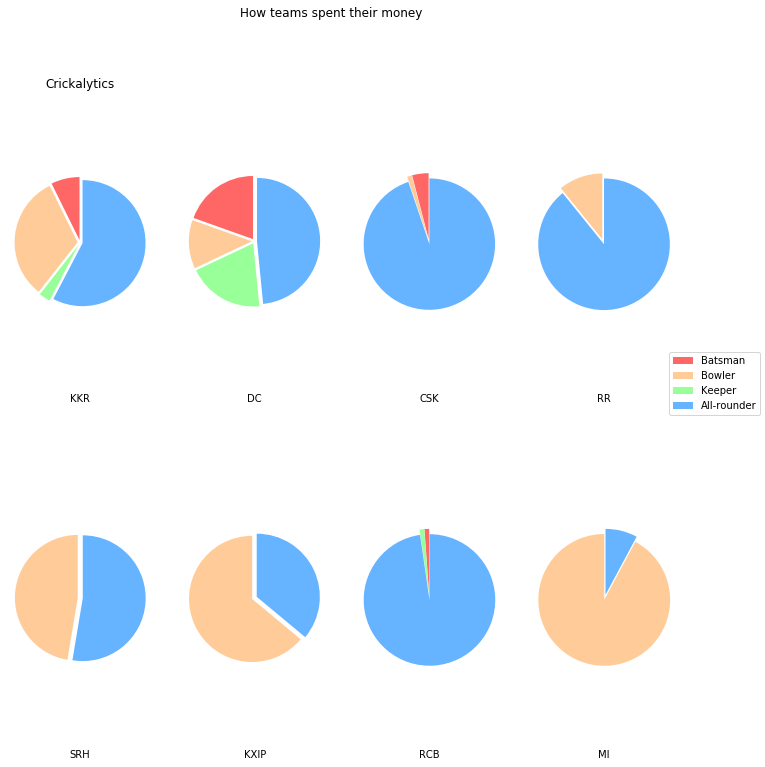

In [154]:
import matplotlib.pyplot as plt
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
fig, axs = plt.subplots(2,4, figsize=(12,12))
for i in range(int(len(Team)/2)):
    axs[0,i].pie(prices[i,:], colors=colors, startangle=90,radius=5,explode=[0.2,0.2,0.2,0.2],frame=False)
    axs[0,i].set(xlabel=Team[i])
    #axs[0,i].frame("off")
    
    #axs[i].legend(leg, loc='best')

    axs[0,i].axis('equal')
    
    #axs[0,i].xlabel('Crickalytics')
    #axs[0,i].savefig('ipl_batbowl_dist.png',bbox_inches='tight', pad_inches=1)
fig.suptitle('How teams spent their money')    
axs[0,0].set(title='Crickalytics')
for i in range(int(len(Team)/2)):
    axs[1,i].pie(prices[i+4,:], colors=colors, startangle=90,radius=5,explode=[0.2,0.2,0.2,0.2],frame=False)
    axs[1,i].set(xlabel=Team[i+4])
    #axs[1,i].axis("off")
    #axs[i].legend(leg, loc='best')

    axs[1,i].axis('equal')
    
    #axs[0,i].xlabel('Crickalytics')
    #axs[0,i].savefig('ipl_batbowl_dist.png',bbox_inches='tight', pad_inches=1)
fig.suptitle('How teams spent their money')    
fig.legend(['Batsman','Bowler','Keeper','All-rounder'],loc='center right')
fig.savefig('ipl_batbowlTeam_dist.png',bbox_inches='tight', pad_inches=4)
fig.show()

In [190]:
df[df.to=='CSK']

,No.,Name,Country,Age,IPL,Specialism,2020 Team,2020 IPL,C/U/A,Reserve Price (in Lakh),Pr,to
9,2,Moeen Ali,England,33,19,All-rounder,RCB,3,Capped,200,700.0,CSK
39,6,C.Hari Nishaanth,India,24,,Batsman,,,Uncapped,20,20.0,CSK
46,7,K Gowtham,India,32,24,All-rounder,KXIP,2,Uncapped,20,925.0,CSK
81,11,Cheteshwar Pujara,India,33,30,Batsman,,,Capped,50,50.0,CSK
195,25,M. Harisankar Reddy,India,22,,Bowler,,,Uncapped,20,20.0,CSK
296,36,K.Bhagath Varma,India,22,,All-rounder,,,Uncapped,20,20.0,CSK


In [191]:
df[df.to=='RR']

,No.,Name,Country,Age,IPL,Specialism,2020 Team,2020 IPL,C/U/A,Reserve Price (in Lakh),Pr,to
10,2,Shivam Dube,India,27,15,All-rounder,RCB,11,Capped,50,440.0,RR
14,2,Chris Morris,South Africa,33,70,All-rounder,RCB,9,Capped,75,1625.0,RR
24,4,Mustafizur Rahman,Bangladesh,25,24,Bowler,,,Capped,100,100.0,RR
63,9,Chetan Sakariya,India,23,,Bowler,,,Uncapped,20,120.0,RR
68,10,K.C Cariappa,India,26,11,Bowler,,,Uncapped,20,20.0,RR
132,17,Akash Singh,India,18,0,Bowler,RR,0,Uncapped,20,20.0,RR
145,19,Liam Livingstone,England,27,4,All-rounder,,,Capped,75,75.0,RR
197,25,Kuldip Yadav,India,24,,Bowler,,,Uncapped,20,20.0,RR


In [199]:
df[df.iloc[:,-1]=='KXIP']

,No.,Name,Country,Age,IPL,Specialism,2020 Team,2020 IPL,C/U/A,Reserve Price (in Lakh),Pr,to
12,2,Dawid Malan,England,33,,All-rounder,,,Capped,150,150.0,KXIP
25,4,Jhye Richardson,Australia,24,,Bowler,,,Capped,150,1400.0,KXIP
48,7,Shahrukh Khan,India,25,,All-rounder,,,Uncapped,20,525.0,KXIP
60,9,Riley Meredith,Australia,24,,Bowler,,,Uncapped,40,800.0,KXIP
86,12,Moises Henriques,Australia,34,57,All-rounder,,,Capped,100,420.0,KXIP
113,15,Jalaj Saxena,India,34,0,All-rounder,,,Uncapped,30,30.0,KXIP
115,15,Utkarsh Singh,India,22,,All-rounder,,,Uncapped,20,20.0,KXIP
142,19,Fabian Allen,West Indies,25,0,All-rounder,SRH,0,Capped,75,75.0,KXIP
329,NaN,Kumar,India,20,NaN,All-rounder,NaN,NaN,uncapped,20,20.0,KXIP
